## Daily Challenge: W5_D3

### Classifying Handwritten Digits with CNNs

### Create:

You will create two models:
- A Fully Connected Neural Network (Dense layers) to classify handwritten digits from the MNIST dataset.
- A Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset, and compare its performance with the first model.


### Step 1 - Load the MNIST Dataset

In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


The training set contains 60,000 images of size 28x28 pixels, and the test set contains 10,000 images. Each label is a single integer from 0 to 9 representing the digit class.

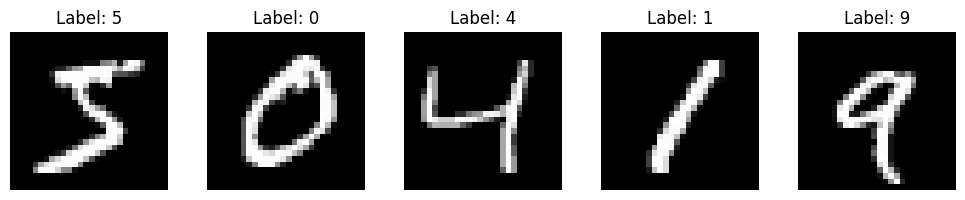

In [ ]:
# Visualize the first 5 training images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Step 2 - Preprocess Data for Fully Connected Neural Network

In [ ]:
# Flatten and normalize pixel values
X_train_fc = X_train.reshape(X_train.shape[0], 28*28).astype("float32") / 255
X_test_fc = X_test.reshape(X_test.shape[0], 28*28).astype("float32") / 255

# One-hot encode labels
y_train_fc = to_categorical(y_train, num_classes=10)
y_test_fc = to_categorical(y_test, num_classes=10)

### Step 3 - Build and Train the Fully Connected Neural Network

In [ ]:
# Create the dense model
fc_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
fc_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history_fc = fc_model.fit(
    X_train_fc, y_train_fc,
    epochs=10,
    batch_size=128,
    validation_data=(X_test_fc, y_test_fc)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8303 - loss: 0.6060 - val_accuracy: 0.9528 - val_loss: 0.1591
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9579 - loss: 0.1417 - val_accuracy: 0.9649 - val_loss: 0.1165
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9721 - loss: 0.0937 - val_accuracy: 0.9682 - val_loss: 0.1033
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9801 - loss: 0.0674 - val_accuracy: 0.9753 - val_loss: 0.0792
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0530 - val_accuracy: 0.9754 - val_loss: 0.0779
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9763 - val_loss: 0.0757
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9905 - loss: 0.0329 - val_accuracy: 0.9772 - val_loss: 0.0738
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.

Fully Connected Neural Network Training Results
- The model achieved a final training accuracy of 99.46% and a validation accuracy of 97.80% after 10 epochs.
- The training loss steadily decreased from 0.6060 to 0.0188, indicating that the model learned the task effectively.
- The validation loss decreased overall from 0.1591 to 0.0749, with a slight increase in the last few epochs, which suggests a minor overfitting effect.
- The performance demonstrates that a dense neural network can reach high accuracy on MNIST but may still be outperformed by convolutional architectures.

Summary of Key Metrics:
- Initial Validation Accuracy: 95.28% (Epoch 1)
- Final Validation Accuracy: 97.80% (Epoch 10)
- Final Validation Loss: 0.0749

In [ ]:
# Function to plot accuracy and loss
def plot_training_metrics(history, model_name="Model"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    epochs = range(1, len(history.history['accuracy']) + 1)
    axes[0].plot(epochs, history.history['accuracy'], label='Train Accuracy', color='green')
    axes[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    axes[0].set_title(f'{model_name} - Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss plot
    axes[1].plot(epochs, history.history['loss'], label='Train Loss', color='blue')
    axes[1].plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')
    axes[1].set_title(f'{model_name} - Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

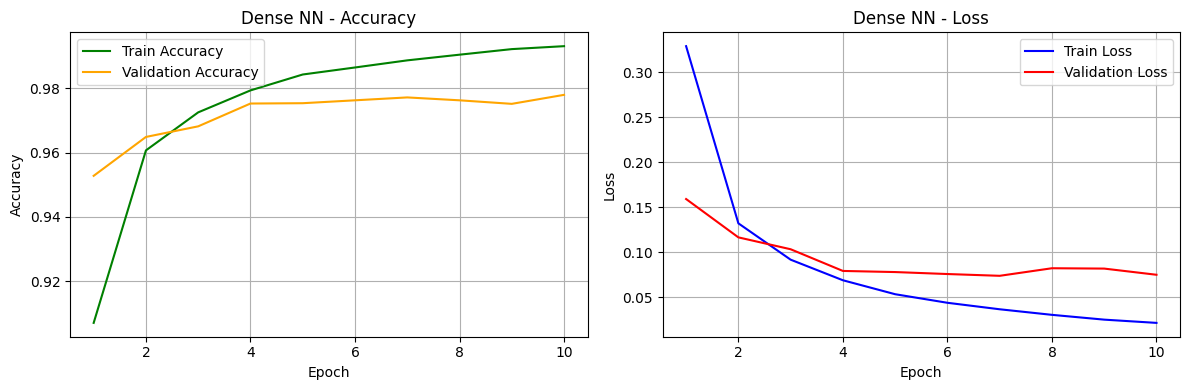

In [ ]:
plot_training_metrics(history_fc, model_name="Dense NN")

Interpretation of the Dense Neural Network Training Curves
- The training accuracy increased consistently across epochs, starting around 91% and reaching about 99% by epoch 10.
- The validation accuracy improved from approximately 95% to 97.8%, demonstrating good generalization to unseen data.
- The training loss decreased steadily from ~0.31 to ~0.018, reflecting effective learning.
- The validation loss dropped from ~0.16 to ~0.07, but it slightly increased after epoch 8, suggesting a minor overfitting effect.
- Overall, the model shows excellent performance for a dense architecture on MNIST, achieving high accuracy while maintaining a stable validation loss.

### Step 4 - Preprocess Data for Convolutional Neural Network

In [ ]:
# Reshape images to (28,28,1) and normalize
X_train_cnn = X_train.reshape(X_train.shape[0], 28,28,1).astype("float32") / 255
X_test_cnn = X_test.reshape(X_test.shape[0], 28,28,1).astype("float32") / 255

# One-hot encode labels
y_train_cnn = to_categorical(y_train, num_classes=10)
y_test_cnn = to_categorical(y_test, num_classes=10)

### Step 5 - Build and Train the Convolutional Neural Network

In [ ]:
# Create the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the CNN
cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the CNN
history_cnn = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=10,
    batch_size=128,
    validation_data=(X_test_cnn, y_test_cnn)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step - accuracy: 0.8610 - loss: 0.4951 - val_accuracy: 0.9820 - val_loss: 0.0539
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.9834 - loss: 0.0583 - val_accuracy: 0.9855 - val_loss: 0.0447
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.9871 - loss: 0.0405 - val_accuracy: 0.9891 - val_loss: 0.0317
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.9910 - loss: 0.0304 - val_accuracy: 0.9904 - val_loss: 0.0269
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9940 - loss: 0.0209 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.9896 - val_loss: 0.0276
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9895 - val_loss: 0.0323
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9958 - loss: 0.0118

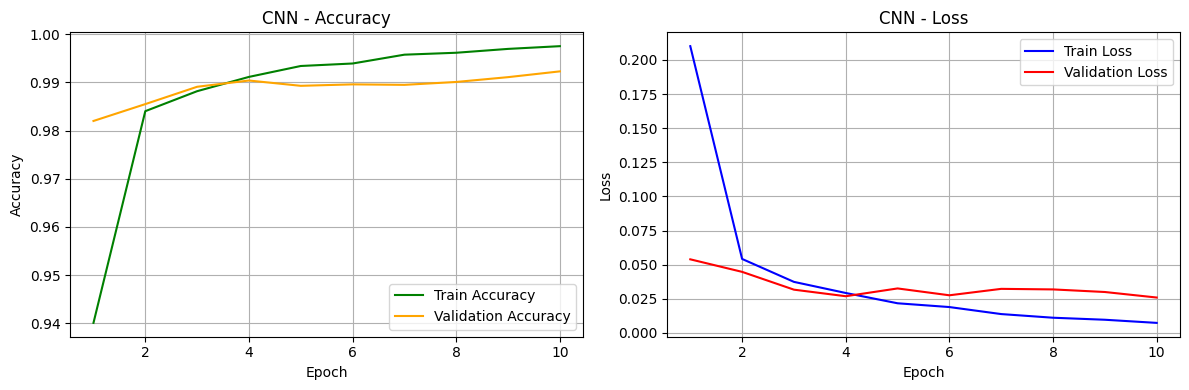

In [ ]:
plot_training_metrics(history_cnn, model_name="CNN")

Convolutional Neural Network Training Results:
- The CNN achieved a final training accuracy of 99.79% and a validation accuracy of 99.23% after 10 epochs.
- The training loss decreased significantly from 0.4951 to 0.0065, demonstrating excellent learning.
- The validation loss dropped from 0.0539 to 0.0259, showing consistent improvement and very low error.
- The validation accuracy was already above 98% from the first epoch and improved further, indicating fast convergence.
- There is minimal overfitting visible: the gap between training and validation loss remains small.

Summary of Key Metrics:
- Initial Validation Accuracy: 98.20% (Epoch 1)
- Final Validation Accuracy: 99.23% (Epoch 10)
- Final Validation Loss: 0.0259

The training curves confirm this performance:
- The accuracy curve shows rapid growth and stabilizes above 99%.
- The loss curve decreases steadily with only minor fluctuations.
- Compared to the dense neural network, the CNN achieved higher accuracy and lower loss, confirming its superior capacity to learn spatial features from images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


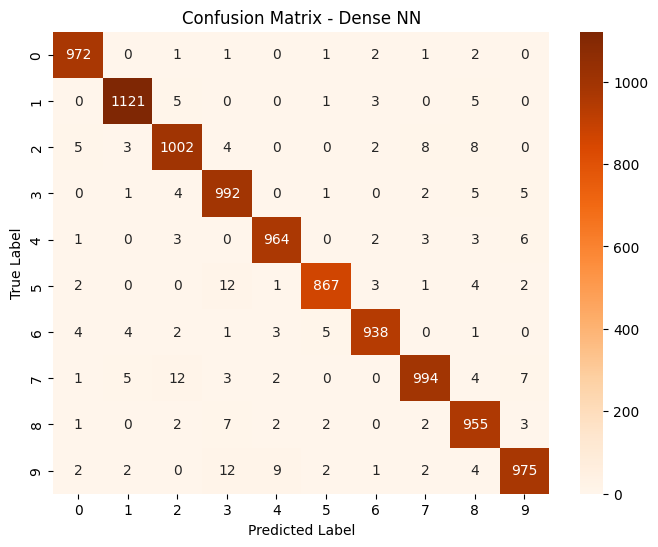

In [ ]:
# Predict and create confusion matrix
y_pred_fc = fc_model.predict(X_test_fc)
y_pred_classes_fc = np.argmax(y_pred_fc, axis=1)
y_true_fc = np.argmax(y_test_fc, axis=1)

cm_fc = confusion_matrix(y_true_fc, y_pred_classes_fc)

plt.figure(figsize=(8,6))
sns.heatmap(cm_fc, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Dense NN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix for the dense neural network shows that most digits were correctly classified, with high counts along the diagonal. However, some errors remain, especially confusion between 5 and 6, as well as occasional misclassifications between 2 and 8 or 4 and 9. Digit 5 was particularly challenging for the model, which is common due to the similarity in handwriting styles. Overall, the dense network achieved strong performance but still produced some predictable classification mistakes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


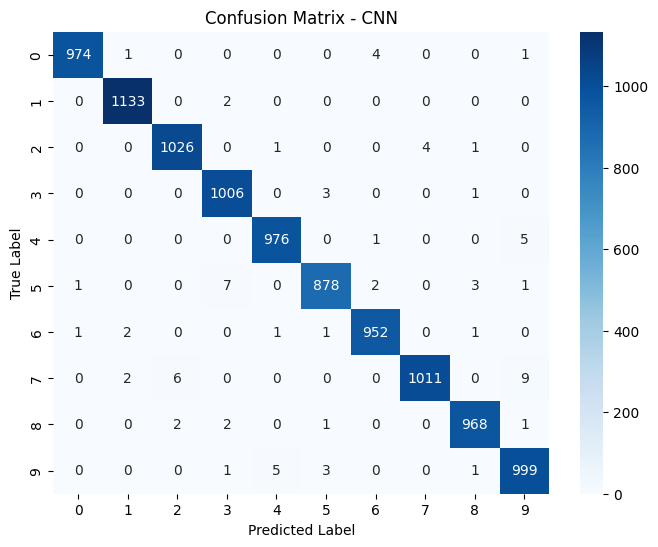

In [ ]:
# Predict and create confusion matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

cm_cnn = confusion_matrix(y_true_cnn, y_pred_classes_cnn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix for the CNN shows very few classification errors overall, with almost all digits predicted correctly. Most classes have nearly perfect counts along the diagonal, and only a small number of misclassifications appear, mainly involving 5, 4, and 9. Compared to the dense network, the CNN clearly reduces confusion between similar digits and demonstrates much higher precision and robustness.

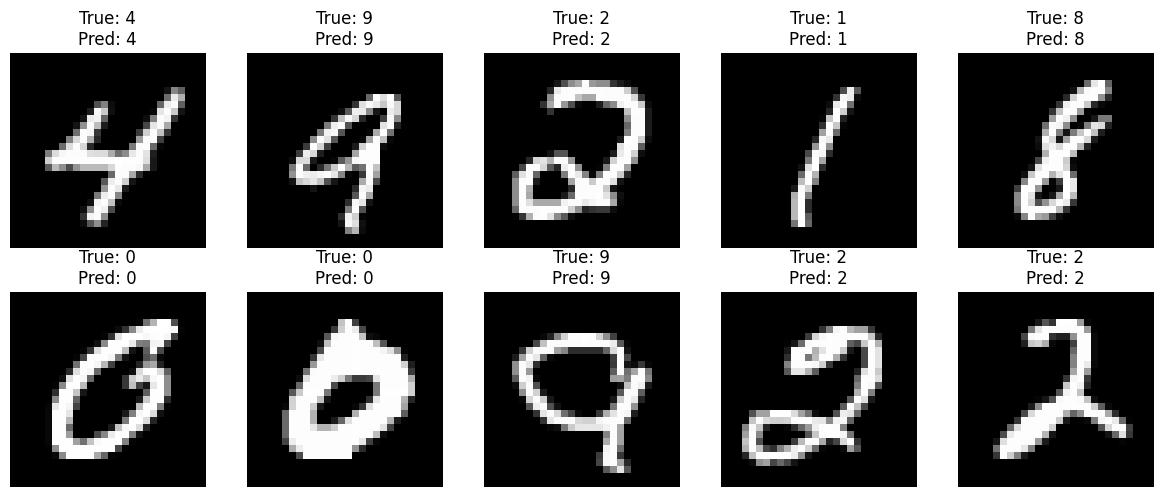

In [ ]:
# Display random predictions from CNN
random_indices = np.random.choice(len(X_test_cnn), size=10, replace=False)

plt.figure(figsize=(12,5))
for i, idx in enumerate(random_indices):
    image = X_test_cnn[idx].reshape(28,28)
    true_label = y_true_cnn[idx]
    pred_label = y_pred_classes_cnn[idx]
    plt.subplot(2,5,i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Step 6 - Evaluate and Compare the Models

In [ ]:
# Evaluate Fully Connected Model
fc_score = fc_model.evaluate(X_test_fc, y_test_fc, verbose=0)
print("Fully Connected Model Accuracy:", fc_score[1])

# Evaluate CNN Model
cnn_score = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print("CNN Model Accuracy:", cnn_score[1])

Fully Connected Model Accuracy: 0.9779999852180481
CNN Model Accuracy: 0.9922999739646912


### Step 7 - Performance Comparison Summary

The fully connected neural network achieved a final test accuracy of 97.80%, while the convolutional neural network reached 99.23%. The CNN consistently produced lower validation loss and fewer classification errors, as shown in the confusion matrices. This demonstrates that convolutional architectures are significantly more effective for image recognition tasks because they can efficiently learn spatial patterns and generalize to unseen data. While both models performed strongly on MNIST, the CNN clearly provided superior accuracy and robustness.